In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io

In [2]:
data=scipy.io.loadmat('ex3data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [14]:
x=data['X']
#x=x*255
#x=x.T
x.shape

(5000, 400)

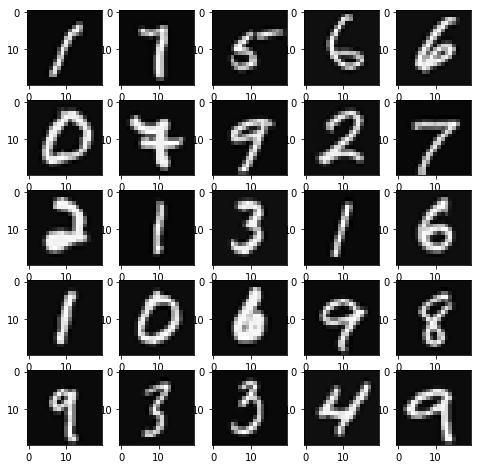

In [19]:
import matplotlib.image as mpi
fig,axis=plt.subplots(5,5,figsize=(8,8))
for i in range(5):
    for j in range(5):
        axis[i,j].imshow(x[np.random.randint(0,5001),:].reshape(20,20,order='F'),cmap='gray')

In [265]:
y=data['y']
y.shape

(5000, 1)

In [266]:
theta0=np.random.randn(25,400)*0.01
theta0
b0=np.zeros((25,5000))

In [267]:
theta1=np.random.randn(10,25)*0.01
theta1
b1=np.zeros((10,5000))

In [268]:
def sigmoid(h):
    return (1/(1+np.exp(-h)))

In [269]:
h1=np.dot(theta0,x)+b0
x1=np.tanh(h1)
h2=np.dot(theta1,x1)+b1
x2=sigmoid(h2)
x2.shape

(10, 5000)

In [270]:
y2=np.zeros((5000,10))
for i in range(0,5000):
    if(y[i]==10):
        y[i]=0
    y2[i][y[i]]=1
y2=y2.T
y2.shape

(10, 5000)

In [271]:
logprobs=np.multiply(np.log(x2),y2)+np.multiply((1-y2),np.log(1-x2))
cost=-np.sum(logprobs)/5000

In [272]:
dh2=x2-y2
dtheta1=(1/5000)*(np.dot(dh2,x1.T))
db1=(1/5000)*(np.sum(dh2,axis=1,keepdims=True))
dh1=np.multiply(np.dot(theta1.T,dh2),1-np.power(x1,2))
dtheta0=(1/5000)*np.dot(dh1,x.T)
db0=(1/5000)*np.sum(dh1,axis=1,keepdims=True)

In [273]:
lr=0.001

In [274]:
theta0=theta0-lr*dtheta0
b0=b0-lr*db0
theta1=theta1-lr*dtheta1
b1=b1-lr*db1

In [275]:
def init(n_h):
    theta0=np.random.randn(n_h,400)*0.01
    theta0
    b0=np.zeros((n_h,5000))
    theta1=np.random.randn(10,n_h)*0.01
    theta1
    b1=np.zeros((10,5000))
    return theta0,b0,theta1,b1

In [276]:
def frwd_prop(x,para):
    theta0=para[0]
    b0=para[1]
    theta1=para[2]
    b1=para[3]
    h1=np.dot(theta0,x)+b0
    x1=np.tanh(h1)
    h2=np.dot(theta1,x1)+b1
    x2=sigmoid(h2)
    return x2,h2,x1,h1

In [277]:
def back_prop(para,cache,x,y2):
    theta0=para[0]
    b0=para[1]
    theta1=para[2]
    b1=para[3]
    x2=cache[0]
    h2=cache[1]
    x1=cache[2]
    h1=cache[3]
    dh2=x2-y2
    dtheta1=(1/5000)*(np.dot(dh2,x1.T))
    db1=(1/5000)*(np.sum(dh2,axis=1,keepdims=True))
    dh1=np.multiply(np.dot(theta1.T,dh2),1-np.power(x1,2))
    dtheta0=(1/5000)*np.dot(dh1,x.T)
    db0=(1/5000)*np.sum(dh1,axis=1,keepdims=True)
    return dtheta0,db0,dtheta1,db1

In [278]:
def update(para,grad):
    theta0=para[0]
    b0=para[1]
    theta1=para[2]
    b1=para[3]
    dtheta0=grad[0]
    db0=grad[1]
    dtheta1=grad[2]
    db1=grad[3]
    theta0=theta0-lr*dtheta0
    b0=b0-lr*db0
    theta1=theta1-lr*dtheta1
    b1=b1-lr*db1
    return theta0,b0,theta1,b1

In [279]:
def nn_model(x,y2,n_h,lr,num_iterations=11000,print_cost=True):
    """
    x-shape of dataset
    y-shape of output layer
    n_h-size of hidden layer
    lr-learning rate
    """
    np.random.seed(2)
    para=init(n_h)
    theta0=para[0]
    b0=para[1]
    theta1=para[2]
    b1=para[3]
    for i in range(0,num_iterations):
        cache=frwd_prop(x,para)
        x2=cache[0]
        logprobs=np.multiply(np.log(x2),y2)+np.multiply((1-y2),np.log(1-x2))
        cost=-np.sum(logprobs)/5000
        grads=back_prop(para,cache,x,y2)
        para=update(para,grads)
        if print_cost and i%1000==0:
            print("Cost after iteration %i: %f" %(i,cost))
    return para

In [300]:
def predict1(para,x):
    cache=frwd_prop(x,para)
    x2=cache[0]
    predictions=x2>=0.5
    return predictions

In [284]:
para=nn_model(x,y2,n_h=25,lr=0.8,num_iterations=11000,print_cost=True)
#plot_decision_boundary(lambda x:predict(para,x.T),x,y2)

Cost after iteration 0: 6.957530
Cost after iteration 1000: 3.256990
Cost after iteration 2000: 3.250914
Cost after iteration 3000: 3.250834
Cost after iteration 4000: 3.237726
Cost after iteration 5000: 3.207020
Cost after iteration 6000: 3.143775
Cost after iteration 7000: 3.003392
Cost after iteration 8000: 2.857998
Cost after iteration 9000: 2.731927
Cost after iteration 10000: 2.623555
